<a href="https://colab.research.google.com/github/khixson1/Employee-Attrition/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Exploratory and Explanatory Data Analysis


Kim Hixson

In [1]:
# mount drive in google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
# load dataset 'employee_attrition.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = '/content/drive/MyDrive/Colab_Notebooks/Coding Dojo/DataScience_Stack1/Week_4_DataScienceFundamentals_ExplanatoryDataViz/Data_Uploads/employee_attrition.csv'
df = pd.read_csv(filename)

In [3]:
# display dimensions of dataframe

display(df.shape)
df.head(10)

(1470, 35)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


The dataframe has 1470 rows and 35 columns

In [4]:
#Identify and address any duplicate values

# check for duplicate rows (https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/)
df_dup = df[df.duplicated()]
df_dup.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Note: There appears to be no duplicated rows in this dataset**

In [5]:
# check column names for spaces or other problematic strings
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Column names do not show any irregularities

In [6]:
#create a dataframe just with categorical data (https://stackoverflow.com/questions/57064439/select-only-categorical-columns-from-a-dataframe)

df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,YearsAtCompany
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,6
1,No,Travel_Frequently,Research & Development,Life Sciences,NaN,Research Scientist,Married,Y,No,10
2,Yes,Travel_Rarely,Research & Development,Other,NaN,Laboratory Technician,Single,Y,Yes,0
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,8
4,No,Travel_Rarely,Research & Development,Medical,NaN,Laboratory Technician,Married,Y,No,2


In [7]:
#Identify and address any missing values in this dataset.
# display the info of the dataframe which shows missing values and datatypes

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

**Note: The dataframe contains missing values in the 'Gender' column.**

In [152]:
# Display individual categories for each categorical column

# value_counts of 'Attrition' column
attrition_cat = pd.Series(df['Attrition']).value_counts()
display(attrition_cat)
print('________________________________________')

# value_counts of 'BusinessTravel' column
business_travel_cat = pd.Series(df['BusinessTravel']).value_counts()
display(business_travel_cat)
print('________________________________________')

# value_counts of 'Department' column
department_cat = pd.Series(df['Department']).value_counts()
display(department_cat)
print('________________________________________')

# value_counts of 'EducationField' column
education_cat = pd.Series(df['EducationField']).value_counts()
display(education_cat)
print('________________________________________')

# value_counts of 'Gender' column
gender_cat = pd.Series(df['Gender']).value_counts()
display(gender_cat)
print('________________________________________')

# value_counts of 'JobRole' column
jobrole_cat = pd.Series(df['JobRole']).value_counts()
display(jobrole_cat)
print('________________________________________')

# value_counts of 'MaritalStatus' column
marital_cat = pd.Series(df['MaritalStatus']).value_counts()
display(marital_cat)
print('________________________________________')

# value_counts of 'Over18' column
over18_cat = pd.Series(df['Over18']).value_counts()
display(over18_cat)
print('________________________________________')

# value_counts of 'OverTime' column
overtime_cat = pd.Series(df['OverTime']).value_counts()
display(overtime_cat)
print('________________________________________')

# value_counts of 'YearsAtCompany' column
years_cat = pd.Series(df['YearsAtCompany']).value_counts()
display(years_cat)
print('________________________________________')

No     1233
Yes     237
Name: Attrition, dtype: int64

________________________________________


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

________________________________________


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

________________________________________


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

________________________________________


Male      882
Female    588
Name: Gender, dtype: int64

________________________________________


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

________________________________________


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

________________________________________


Y    1470
Name: Over18, dtype: int64

________________________________________


No     1054
Yes     416
Name: OverTime, dtype: int64

________________________________________


5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
51      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

________________________________________


**Note: The categorical data appear to be fine except for gender which contains missing values.  Only female are documented. I am making an assumption here that the missing values are thus all male. I will impute the missing values with the string 'Male'**

In [153]:
# impute missing values in "Gender" column with 'Male'

df2 = pd.DataFrame(df.loc[:, 'Gender'].fillna('Male'))
df['Gender'] = df2['Gender']

# verify fill was performed correctly
display(df.info())

# verify also with value_counts of 'Gender' column
gender_cat = pd.Series(df['Gender']).value_counts()
display(gender_cat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

Male      882
Female    588
Name: Gender, dtype: int64

**Note: Missing values now appear to be imputed correctly**

In [154]:
#Ensure all columns match the data types listed in the data dictionary.
filename2='/content/drive/MyDrive/Colab_Notebooks/Coding Dojo/DataScience_Stack1/Week_4_DataScienceFundamentals_ExplanatoryDataViz/Data_Uploads/data_dictionary.xlsx'
data_dic_df = pd.read_excel(filename2, header=0)
data_dic_df = pd.DataFrame(data_dic_df)
data_dic_df.sort_values('Column Name', ascending=True, inplace=True)
data_dic_2 = data_dic_df.reset_index()
data_dic_2.head(19)


,index,Column Name,Data Type,Description
0,0,Age,int,Age of employee
1,1,Attrition,Object,Employee leaving the company (no or yes)
2,2,BusinessTravel,Object,How much the employee travels for work (no tra...
3,3,DailyRate,Int,Daily Rate
4,4,Department,Object,"Department (HR, R&D, or Sales)"
5,5,DistanceFromHome,Int,Distance from work to home
6,6,Education,Int,Education level: 1 = 'Below College'; 2 = 'Col...
7,7,EducationField,Object,"Education field (HR, Life Sciences, Marketing,..."
8,8,EmployeeCount,Int,Number of employees
9,9,EnvironmentSatisfaction,Int,Satisfaction with the environment: 1 = 'Low'; ...


In [155]:
# 'MonthyRate' of the Data Dictionary did not copy and paste into Excel correctly
# Here I will replace 'MonthlyRateÊ' with 'MonthlyRate' (https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python)

data_dic_2['Column Name'].replace({'MonthlyRateÊ':'MonthlyRate'}, inplace=True)
data_dic_2.head(19)

,index,Column Name,Data Type,Description
0,0,Age,int,Age of employee
1,1,Attrition,Object,Employee leaving the company (no or yes)
2,2,BusinessTravel,Object,How much the employee travels for work (no tra...
3,3,DailyRate,Int,Daily Rate
4,4,Department,Object,"Department (HR, R&D, or Sales)"
5,5,DistanceFromHome,Int,Distance from work to home
6,6,Education,Int,Education level: 1 = 'Below College'; 2 = 'Col...
7,7,EducationField,Object,"Education field (HR, Life Sciences, Marketing,..."
8,8,EmployeeCount,Int,Number of employees
9,9,EnvironmentSatisfaction,Int,Satisfaction with the environment: 1 = 'Low'; ...


In [156]:
# make 'Object' and 'Int' notations consistent in dataframe (https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python)
data_dic_2['Data Type'].replace({'Int':'int64','int':'int64', 'Object':'object'}, inplace=True)
display(data_dic_2.head())

,index,Column Name,Data Type,Description
0,0,Age,int64,Age of employee
1,1,Attrition,object,Employee leaving the company (no or yes)
2,2,BusinessTravel,object,How much the employee travels for work (no tra...
3,3,DailyRate,int64,Daily Rate
4,4,Department,object,"Department (HR, R&D, or Sales)"


In [157]:
#Ensure all columns match the data types listed in the data dictionary.

# create datatypes dataframe for attrition data for comparison to the data dictionary
data_attr_df = pd.DataFrame(df.dtypes)
data_attr = data_attr_df = data_attr_df.reset_index()
data_attr = data_attr.rename(columns={'index': 'Column Name2', 0: 'Data Type2'})
display(data_attr.head())

,Column Name2,Data Type2
0,Age,int64
1,Attrition,object
2,BusinessTravel,object
3,DailyRate,int64
4,Department,object


In [14]:
# join dataframes to see if they match

data_join = data_dic_2.join(data_attr)
data_join

,index,Column Name,Data Type,Description,Column Name2,Data Type2
0,0,Age,int64,Age of employee,Age,int64
1,1,Attrition,object,Employee leaving the company (no or yes),Attrition,object
2,2,BusinessTravel,object,How much the employee travels for work (no tra...,BusinessTravel,object
3,3,DailyRate,int64,Daily Rate,DailyRate,int64
4,4,Department,object,"Department (HR, R&D, or Sales)",Department,object
5,5,DistanceFromHome,int64,Distance from work to home,DistanceFromHome,int64
6,6,Education,int64,Education level: 1 = 'Below College'; 2 = 'Col...,Education,int64
7,7,EducationField,object,"Education field (HR, Life Sciences, Marketing,...",EducationField,object
8,8,EmployeeCount,int64,Number of employees,EmployeeCount,int64
9,9,EnvironmentSatisfaction,int64,Satisfaction with the environment: 1 = 'Low'; ...,EmployeeNumber,int64


****Note: The data dictionary provided does not have an 'EmployeeNumber' column and there is one entry of 'int' which was not capitalized. To compare the datasets, I will drop the employee number and see if the Data Type columns match. **bold text**

In [15]:
# delete 'EmployeeNumber' row in attrition data type dataframe and reset the index

data_attr_2 = data_attr[data_attr['Column Name2'] != 'EmployeeNumber'] #drop EmployeeNumber
data_attr_2.reset_index(inplace=True, drop=True)
data_attr_2.head(11)


,Column Name2,Data Type2
0,Age,int64
1,Attrition,object
2,BusinessTravel,object
3,DailyRate,int64
4,Department,object
5,DistanceFromHome,int64
6,Education,int64
7,EducationField,object
8,EmployeeCount,int64
9,EnvironmentSatisfaction,int64


In [16]:
# join dataframes again to see if they match

data_join2 = data_dic_2.join(data_attr_2)
data_join2

,index,Column Name,Data Type,Description,Column Name2,Data Type2
0,0,Age,int64,Age of employee,Age,int64
1,1,Attrition,object,Employee leaving the company (no or yes),Attrition,object
2,2,BusinessTravel,object,How much the employee travels for work (no tra...,BusinessTravel,object
3,3,DailyRate,int64,Daily Rate,DailyRate,int64
4,4,Department,object,"Department (HR, R&D, or Sales)",Department,object
5,5,DistanceFromHome,int64,Distance from work to home,DistanceFromHome,int64
6,6,Education,int64,Education level: 1 = 'Below College'; 2 = 'Col...,Education,int64
7,7,EducationField,object,"Education field (HR, Life Sciences, Marketing,...",EducationField,object
8,8,EmployeeCount,int64,Number of employees,EmployeeCount,int64
9,9,EnvironmentSatisfaction,int64,Satisfaction with the environment: 1 = 'Low'; ...,EnvironmentSatisfaction,int64


In [17]:
# test match between the Data Dictionary and Attrition Dataframes

column_match = (data_dic_2['Column Name'] != data_attr_2['Column Name2'])
display(column_match.sum())

datatype_match = (data_dic_2['Data Type'] != data_attr_2['Data Type2'])
display(datatype_match.sum())

# display the mismatch
df_mismatch = data_attr_2[datatype_match]
display(data_join2[datatype_match])

1

1

,index,Column Name,Data Type,Description,Column Name2,Data Type2
30,30,YearsAtCompany,int64,Total number of years at the company,YearsAtCompany,object


**Note: There is a data type mismatch with 'YearsAtCompany'.  The Data Dictionary shows these values to be integers and the Attrition dataframe shows this column to be an object.**

In [18]:
# Identify row in 'YearAtCompany' in the Attrition dataframe (df) which is causing the mismatch and is forcing this column to be an 'object'

# df['YearsAtCompany'] = pd.to_numeric(df['YearsAtCompany'])      THIS CODE GIVES AN ERROR REFERING TO A STRING '5!'  I will next locate string and convert it to the number 51

odd_string = df['YearsAtCompany'] == '5!'
df[odd_string]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
35,43,No,Travel_Rarely,1273,Research & Development,2,2,Medical,1,46,...,4,80,2,6,3,2,5!,3,1,4


**Note: The row that is causing the problem with 'YearsAtCompany' having an integer datatype is index 35, EmployeeNumber 46.  I will replace the '5!' value with 51 and coerce the column to integers.**

In [19]:
# Replace erroneous string and convert column to numerical data

# replace '5!' with a string of '51' (https://pretagteam.com/question/how-to-delete-the-cell-from-python-pandas-dataframe)
df.at[35, 'YearsAtCompany'] = '51'

# convert 'YearsAtCompany' from string to integer (https://www.geeksforgeeks.org/convert-the-data-type-of-pandas-column-to-int/)
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)

# check replacement and integer coersion
display(df['YearsAtCompany'][35])
display(df.info())
display(df['YearsAtCompany'].describe())

51

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

count    1470.000000
mean        7.039456
std         6.232816
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        51.000000
Name: YearsAtCompany, dtype: float64

**Note: '5!' error has been corrected to 51 and the column has been converted to integers. This column now is an integer and the range of values appear to be valid**

In [20]:
# A closer look at the numerical data to see if all looks well before moving into exploratory visualizations

# view just the numerical data with new 'YearsAtCompany' column added (https://stackoverflow.com/questions/57064439/select-only-categorical-columns-from-a-dataframe)
df_num = df.select_dtypes(include=['int64', 'float', 'int'])
display(df_num.head())

# evaluate numerical data using describe
df_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.039456,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.232816,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,51.000000,18.000000,15.000000,17.000000


**'EmployeeCount' and 'StandardHours' columns all contain that same data and therefore would not be very interesting to analyze. I will delete these columns.**

In [23]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
#drop columns with no distributions (https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe) and name this dataframe 'my_df'
my_df = df.drop(['EmployeeCount', 'StandardHours'], axis= 1)
my_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


This multivariate heatmap shows that columns 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'MonthlyIncome', and 'JobLevel' are all positively correlated with 'YearsAtCompany', 'YearsInCurrentRole', and 'YearsWithCurrManager' being highly correlated.

Other highly correlated columns includ 'PercentSalaryHike' versus 'PerformanceRating' and 'JobLevel' versus 'MonthlyIncome'

"TotalWorkingYears' was also highly correlated to "JobLevel" and "MonthlyIncome"

In summary, the longer someone works, the higher is their income and job level. And the higher the performance, the higher the salary hikes.

In [25]:
# Create subplots showing univariate boxplot distributions of select numerical data

In [26]:
my_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

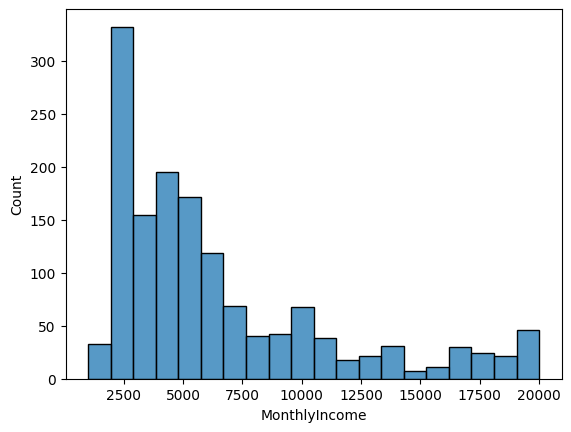

In [27]:
# Create univariate histograms of 'MonthlyIncome'
sns.histplot(df['MonthlyIncome']);

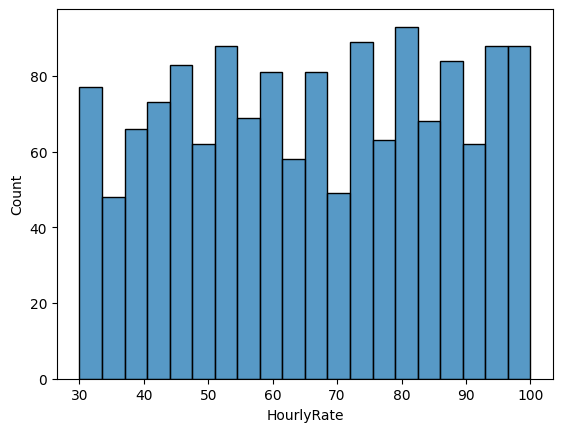

In [28]:
# Create univariate histogram of Hourly Rate
sns.histplot(df['HourlyRate'], bins=20);

Comparison of Monthly Income and Hourly Rate Income show more of a normal distribution of monthly income as compared to hourly rate income.

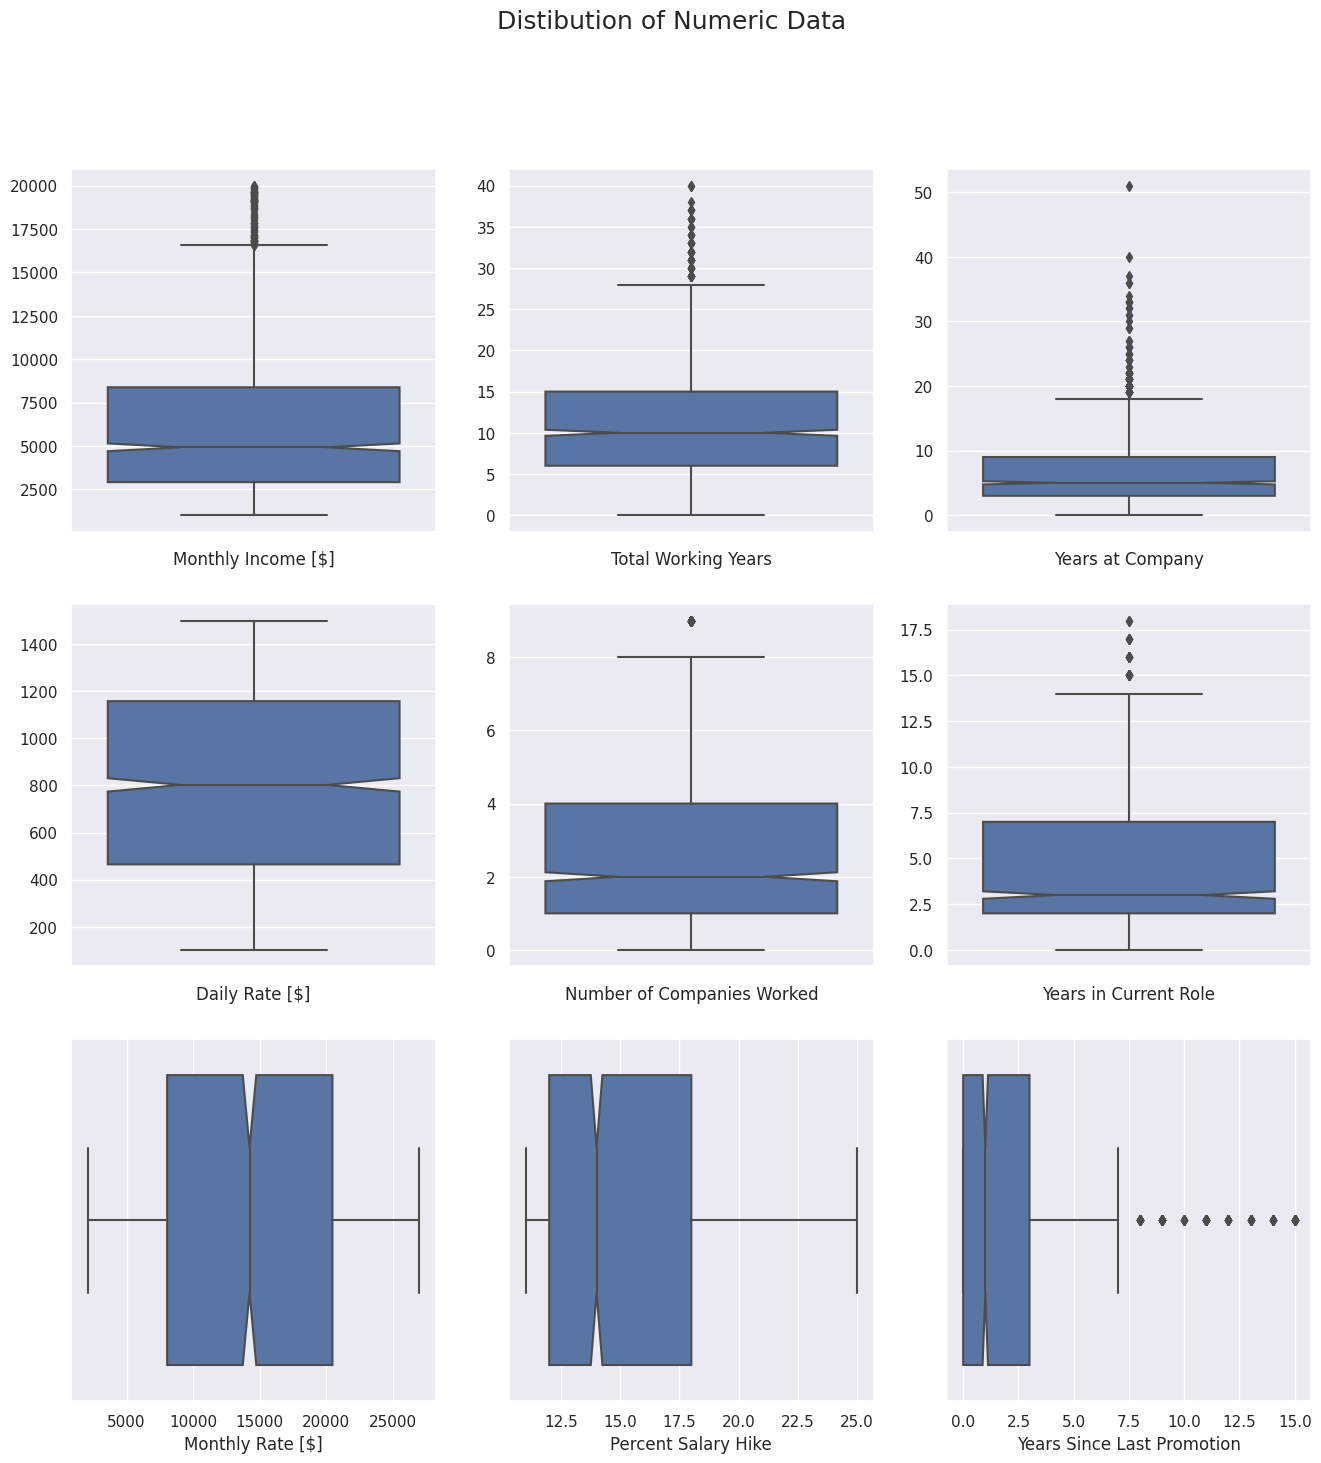

In [29]:
# Create univariate subplot comparisons showing data distributions for numerical data

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(16, 16));
fig.suptitle('Distibution of Numeric Data', fontsize=18);

#plot1
ax1 = sns.boxplot(data = my_df,
                  y = 'MonthlyIncome',
                  notch=True,
                  ax = axes[0,0]);
ax1.set_ylabel('');
ax1.set_xlabel("Monthly Income [$]", fontsize=12);

#plot3
ax2 = sns.boxplot(data = my_df,
                  y = 'TotalWorkingYears',
                  notch=True,
                  ax = axes[0,1]);
ax2.set_xlabel("Total Working Years", fontsize=12);
ax2.set_ylabel('');

#plot3
ax3 = sns.boxplot(data = my_df,
                  y = 'YearsAtCompany',
                  notch=True,
                  ax = axes[0,2]);
ax3.set_xlabel("Years at Company", fontsize=12);
ax3.set_ylabel('');

#plot4
ax4 = sns.boxplot(data = my_df,
                  y = 'DailyRate',
                  notch=True,
                  ax = axes[1,0]);
ax4.set_xlabel('Daily Rate [$]', fontsize=12);
ax4.set_ylabel('');

#plot5
ax5 = sns.boxplot(data = my_df,
                  y = 'NumCompaniesWorked',
                  notch=True,
                  ax = axes[1,1]);
ax5.set_xlabel("Number of Companies Worked", fontsize=12);
ax5.set_ylabel('');

#plot6
ax6 = sns.boxplot(data = my_df,
                  y = 'YearsInCurrentRole',
                  notch=True,
                  ax = axes[1,2]);
ax6.set_xlabel("Years in Current Role", fontsize=12);
ax6.set_ylabel('');

#plot7
ax7 = sns.boxplot(data = my_df,
                  x = 'MonthlyRate',
                  notch=True,
                  ax = axes[2,0]);
ax7.set_xlabel("Monthly Rate [$]", fontsize=12);
ax7.set_ylabel('');

#plot8
ax8 = sns.boxplot(data = my_df,
                  x = 'PercentSalaryHike',
                  notch=True,
                  ax = axes[2,1]);
ax8.set_xlabel("Percent Salary Hike", fontsize=12);
ax8.set_ylabel('');

#plot9
ax9 = sns.boxplot(data = my_df,
                  x = 'YearsSinceLastPromotion',
                  notch=True,
                  ax = axes[2,2]);
ax9.set_xlabel("Years Since Last Promotion", fontsize=12);
ax9.set_ylabel('');

These univariate boxplots show the most even distibutions in daily and monthly rate data and total working years.  Monthly income however shows a right scew which suggests that there are individuals who make more money through another mechanism other than their daily or hourly salary.

All other distributions analyzed here are right scewed showing more density in the data for people working fewer years, having fewer years at the company, fewer years since last promotion.

In [30]:
my_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [31]:
#Make copy of my_df with categorical data replaced with integers
my_df2 = my_df.copy()

In [32]:
#Convert Categorical Data to Numeric form so as to view correlations
#Create lists for each category
attrition_list = my_df2['Attrition'].values.tolist()
bus_travel_freq_list = my_df2['BusinessTravel'].values.tolist()
department_list = my_df2['Department'].values.tolist()
field_list = my_df2['EducationField'].values.tolist()
gender_list = my_df2['Gender'].values.tolist()
marital_stat_list = my_df2['MaritalStatus'].values.tolist()
overtime_list = my_df2['OverTime'].values.tolist()
job_role_list = my_df2['JobRole'].values.tolist()

In [33]:
#View unique categories in each list
display(list(np.unique(attrition_list)))
display(list(np.unique(bus_travel_freq_list)))
display(list(np.unique(department_list)))
display(list(np.unique(field_list)))
display(list(np.unique(gender_list)))
display(list(np.unique(marital_stat_list)))
display(list(np.unique(overtime_list)))
display(list(np.unique(job_role_list)))

['No', 'Yes']

['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

['Human Resources', 'Research & Development', 'Sales']

['Human Resources',
 'Life Sciences',
 'Marketing',
 'Medical',
 'Other',
 'Technical Degree']

['Female', 'Male']

['Divorced', 'Married', 'Single']

['No', 'Yes']

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [35]:
#Convert Categorical Data to Numeric form so as to view correlations
#Create lists for each category
#Use loop to replace categorical data with integer
#Attrition
#Here we will label yes = 1, no = 0
attrition_ls = []
for i in range(0,len(attrition_list),1):
  val = attrition_list[i]
  if val == 'Yes':
    attrition_ls.append(1)
  else:
    attrition_ls.append(0)
my_df2['Attrition'] = attrition_ls

#BusinessTravel
business_travel_ls = []
for i in range(0,len(bus_travel_freq_list),1):
  val = bus_travel_freq_list[i]
  if val == 'Travel_Frequently':
    new_val = 2
  elif val == 'Travel_Rarely':
    new_val = 1
  else:
    new_val = 0
  business_travel_ls.append(new_val)
my_df2['BusinessTravel'] = business_travel_ls

#Department
#Here we will create new columns that represent Sales, HR, or R&D and populate them with 1 or 0 to represent yes or no
dept_RD_ls = []
dept_HR_ls = []
dept_Sales_ls = []
for i in range(0,len(department_list),1):
  val = department_list[i]
  if val == 'Research & Development':
    dept_RD_ls.append(1)
  else:
    dept_RD_ls.append(0)
  if val == 'Human Resources':
    dept_HR_ls.append(1)
  else:
    dept_HR_ls.append(0)
  if val == 'Sales':
    dept_Sales_ls.append(1)
  else:
    dept_Sales_ls.append(0)
my_df2['Dept. Research & Development'] = dept_RD_ls
my_df2['Dept. Human Resources'] = dept_HR_ls
my_df2['Dept. Sales'] = dept_Sales_ls

#Degree
#Here we will create at new column for each Degree and populate with 1 or 0 to represent yes or no
degree_other_ls = []
degree_HR_ls = []
degree_mark_ls = []
degree_LS_ls = []
degree_med_ls = []
degree_tech_ls = []

for i in range(0,len(field_list),1):
  val = field_list[i]
  if val == 'Technical Degree':
    degree_tech_ls.append(1)
  else:
    degree_tech_ls.append(0)
  if val == 'Medical':
    degree_med_ls.append(1)
  else:
    degree_med_ls.append(0)
  if val == 'Life Sciences':
    degree_LS_ls.append(1)
  else:
    degree_LS_ls.append(0)
  if val == 'Marketing':
    degree_mark_ls.append(1)
  else:
    degree_mark_ls.append(0)
  if val == 'Human Resources':
    degree_HR_ls.append(1)
  else:
    degree_HR_ls.append(0)
  if val == 'Other':
    degree_other_ls.append(1)
  else:
    degree_other_ls.append(0)

my_df2['Degree Technical'] = degree_tech_ls
my_df2['Degree Human Resources'] = degree_HR_ls
my_df2['Degree Other'] = degree_other_ls
my_df2['Degree Life Sciences'] = degree_LS_ls
my_df2['Degree Medical'] = degree_med_ls
my_df2['Degree Marketing'] = degree_mark_ls

#Gender
#Here we will label Female = 0, Male = 1
gender_ls = []
for i in range(0,len(gender_list),1):
  val = gender_list[i]
  if val == 'Female':
    new_val = 0
  else:
    new_val = 1
  gender_ls.append(new_val)
my_df2['Gender'] = gender_ls

#Overtime
#Here we will label yes = 1, no = 0
overtime_ls = []
for i in range(0,len(overtime_list),1):
  val = overtime_list[i]
  if val == 'Yes':
    overtime_ls.append(1)
  else:
    overtime_ls.append(0)
my_df2['OverTime'] = overtime_ls

#Marital Status
#Here we will make new columns of divorced, married, single with yes or no represented as 1 or 0
married_ls = []
divorced_ls = []
single_ls = []
for i in range(0,len(marital_stat_list),1):
  val = marital_stat_list[i]
  if val == 'Divorced':
    divorced_ls.append(1)
  else:
    divorced_ls.append(0)
  if val == 'Married':
    married_ls.append(1)
  else:
    married_ls.append(0)
  if val == 'Single':
    single_ls.append(1)
  else:
    single_ls.append(0)
my_df2['Married'] = married_ls
my_df2['Divorced'] = divorced_ls
my_df2['Single'] = single_ls

#Job Role
role_healthcarerep_ls = []
role_HR_ls = []
role_labtech_ls = []
role_manager_ls = []
role_manufacturing_director_ls = []
role_research_director_ls = []
role_research_scientist_ls = []
role_sales_exec_ls = []
role_sales_rep_ls = []
for i in range(0,len(job_role_list),1):
  val = job_role_list[i]
  if val == 'Healthcare Representative':
    role_healthcarerep_ls.append(1)
  else:
    role_healthcarerep_ls.append(0)
  if val == 'Human Resources':
    role_HR_ls.append(1)
  else:
    role_HR_ls.append(0)
  if val == 'Laboratory Technician':
    role_labtech_ls.append(1)
  else:
    role_labtech_ls.append(0)
  if val == 'Manager':
    role_manager_ls.append(1)
  else:
    role_manager_ls.append(0)
  if val == 'Manufacturing Director':
    role_manufacturing_director_ls.append(1)
  else:
    role_manufacturing_director_ls.append(0)
  if val == 'Research Director':
    role_research_director_ls.append(1)
  else:
    role_research_director_ls.append(0)
  if val == 'Research Scientist':
    role_research_scientist_ls.append(1)
  else:
    role_research_scientist_ls.append(0)
  if val == 'Sales Executive':
    role_sales_exec_ls.append(1)
  else:
    role_sales_exec_ls.append(0)
  if val == 'Sales Representative':
    role_sales_rep_ls.append(1)
  else:
    role_sales_rep_ls.append(0)
my_df2['Role_Healthcare_Representative'] = role_healthcarerep_ls
my_df2['Role_Human_Resources'] = role_HR_ls
my_df2['Role_Laboratory_Technician'] = role_labtech_ls
my_df2['Role_Manager'] = role_manager_ls
my_df2['Role_Manufacturing_Director'] = role_manufacturing_director_ls
my_df2['Role_Research_Director'] = role_research_director_ls
my_df2['Role_Research_Scientist'] = role_research_scientist_ls
my_df2['Role_Sales_Executive'] = role_sales_exec_ls
my_df2['Role_Sales_Representative'] = role_sales_rep_ls

In [36]:
#Removal of categorical data in my_df2
my_df2 = my_df2.drop(columns=['Department','EducationField','Over18','JobRole','MaritalStatus'])
my_df2.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,Single,Role_Healthcare_Representative,Role_Human_Resources,Role_Laboratory_Technician,Role_Manager,Role_Manufacturing_Director,Role_Research_Director,Role_Research_Scientist,Role_Sales_Executive,Role_Sales_Representative
0,41,1,1,1102,1,2,1,2,0,94,...,1,0,0,0,0,0,0,0,1,0
1,49,0,2,279,8,1,2,3,1,61,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1,1373,2,2,4,4,1,92,...,1,0,0,1,0,0,0,0,0,0
3,33,0,2,1392,3,4,5,4,0,56,...,0,0,0,0,0,0,0,1,0,0
4,27,0,1,591,2,1,7,1,1,40,...,0,0,0,1,0,0,0,0,0,0


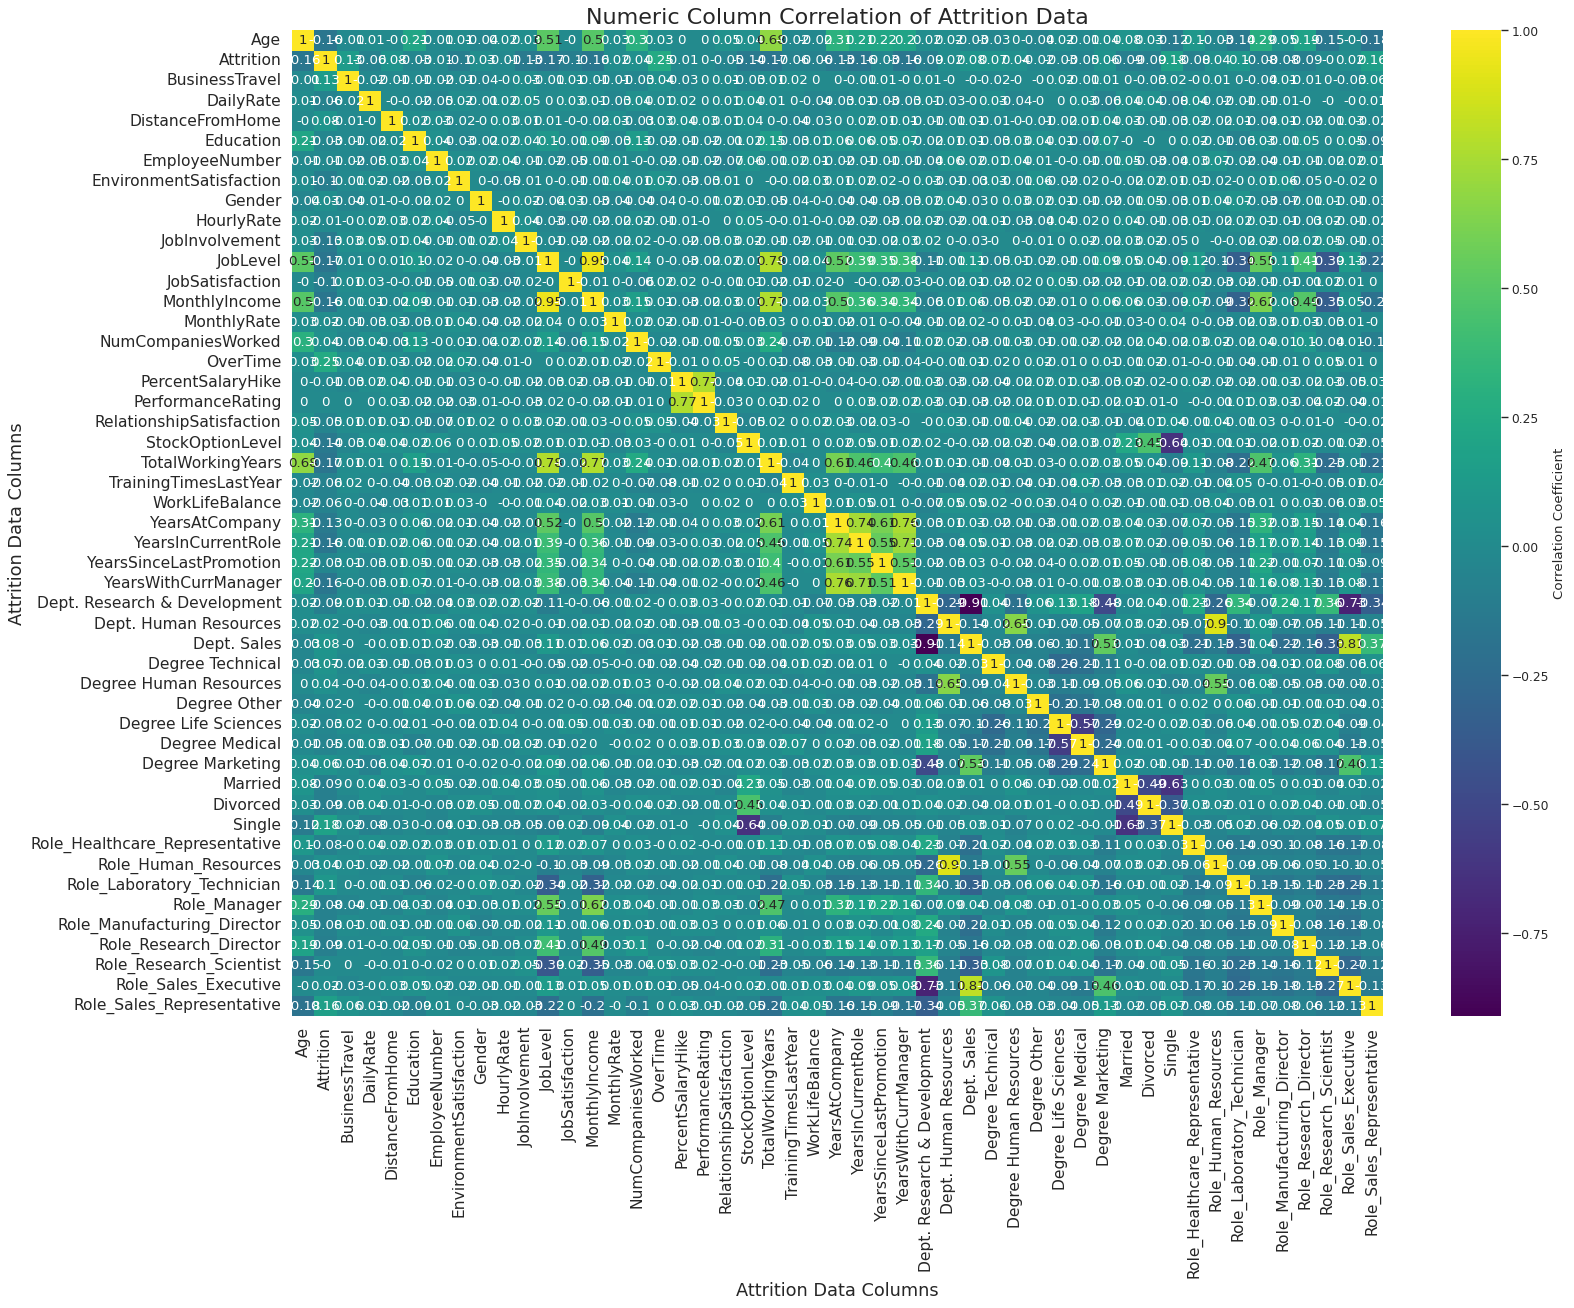

In [37]:
# Multivariate example of exploratory data analysis

# calculate a correlation of numeric data in df
corr = my_df2.corr()
corr = corr.round(2)

# create a multivariate heatmap showing correlations between numeric columns
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (22,16), dpi = 80)

# create heatmap showing correlation between numeric data
sns.set(font_scale=1.0);
ax = sns.heatmap(data=corr,
            annot=True,
            cmap='viridis',
            cbar_kws={'label': 'Correlation Coefficient'});

# set x and y labels and font size
ax.set_title("Numeric Column Correlation of Attrition Data", fontsize=20);
ax.set_ylabel("Attrition Data Columns", fontsize=16);
ax.set_xlabel("Attrition Data Columns", fontsize=16);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14);
ax.set_xticklabels(ax.get_ymajorticklabels(), fontsize = 14);

In [38]:
my_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1470 non-null   int64
 1   Attrition                       1470 non-null   int64
 2   BusinessTravel                  1470 non-null   int64
 3   DailyRate                       1470 non-null   int64
 4   DistanceFromHome                1470 non-null   int64
 5   Education                       1470 non-null   int64
 6   EmployeeNumber                  1470 non-null   int64
 7   EnvironmentSatisfaction         1470 non-null   int64
 8   Gender                          1470 non-null   int64
 9   HourlyRate                      1470 non-null   int64
 10  JobInvolvement                  1470 non-null   int64
 11  JobLevel                        1470 non-null   int64
 12  JobSatisfaction                 1470 non-null   int64
 13  Mon

In [41]:
data_dic_2

,index,Column Name,Data Type,Description
0,0,Age,int64,Age of employee
1,1,Attrition,object,Employee leaving the company (no or yes)
2,2,BusinessTravel,object,How much the employee travels for work (no tra...
3,3,DailyRate,int64,Daily Rate
4,4,Department,object,"Department (HR, R&D, or Sales)"
5,5,DistanceFromHome,int64,Distance from work to home
6,6,Education,int64,Education level: 1 = 'Below College'; 2 = 'Col...
7,7,EducationField,object,"Education field (HR, Life Sciences, Marketing,..."
8,8,EmployeeCount,int64,Number of employees
9,9,EnvironmentSatisfaction,int64,Satisfaction with the environment: 1 = 'Low'; ...


In [39]:
my_df2.iloc[0:10,0:10]

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate
0,41,1,1,1102,1,2,1,2,0,94
1,49,0,2,279,8,1,2,3,1,61
2,37,1,1,1373,2,2,4,4,1,92
3,33,0,2,1392,3,4,5,4,0,56
4,27,0,1,591,2,1,7,1,1,40
5,32,0,2,1005,2,2,8,4,1,79
6,59,0,1,1324,3,3,10,3,0,81
7,30,0,1,1358,24,1,11,4,1,67
8,38,0,2,216,23,3,12,4,1,44
9,36,0,1,1299,27,3,13,3,1,94


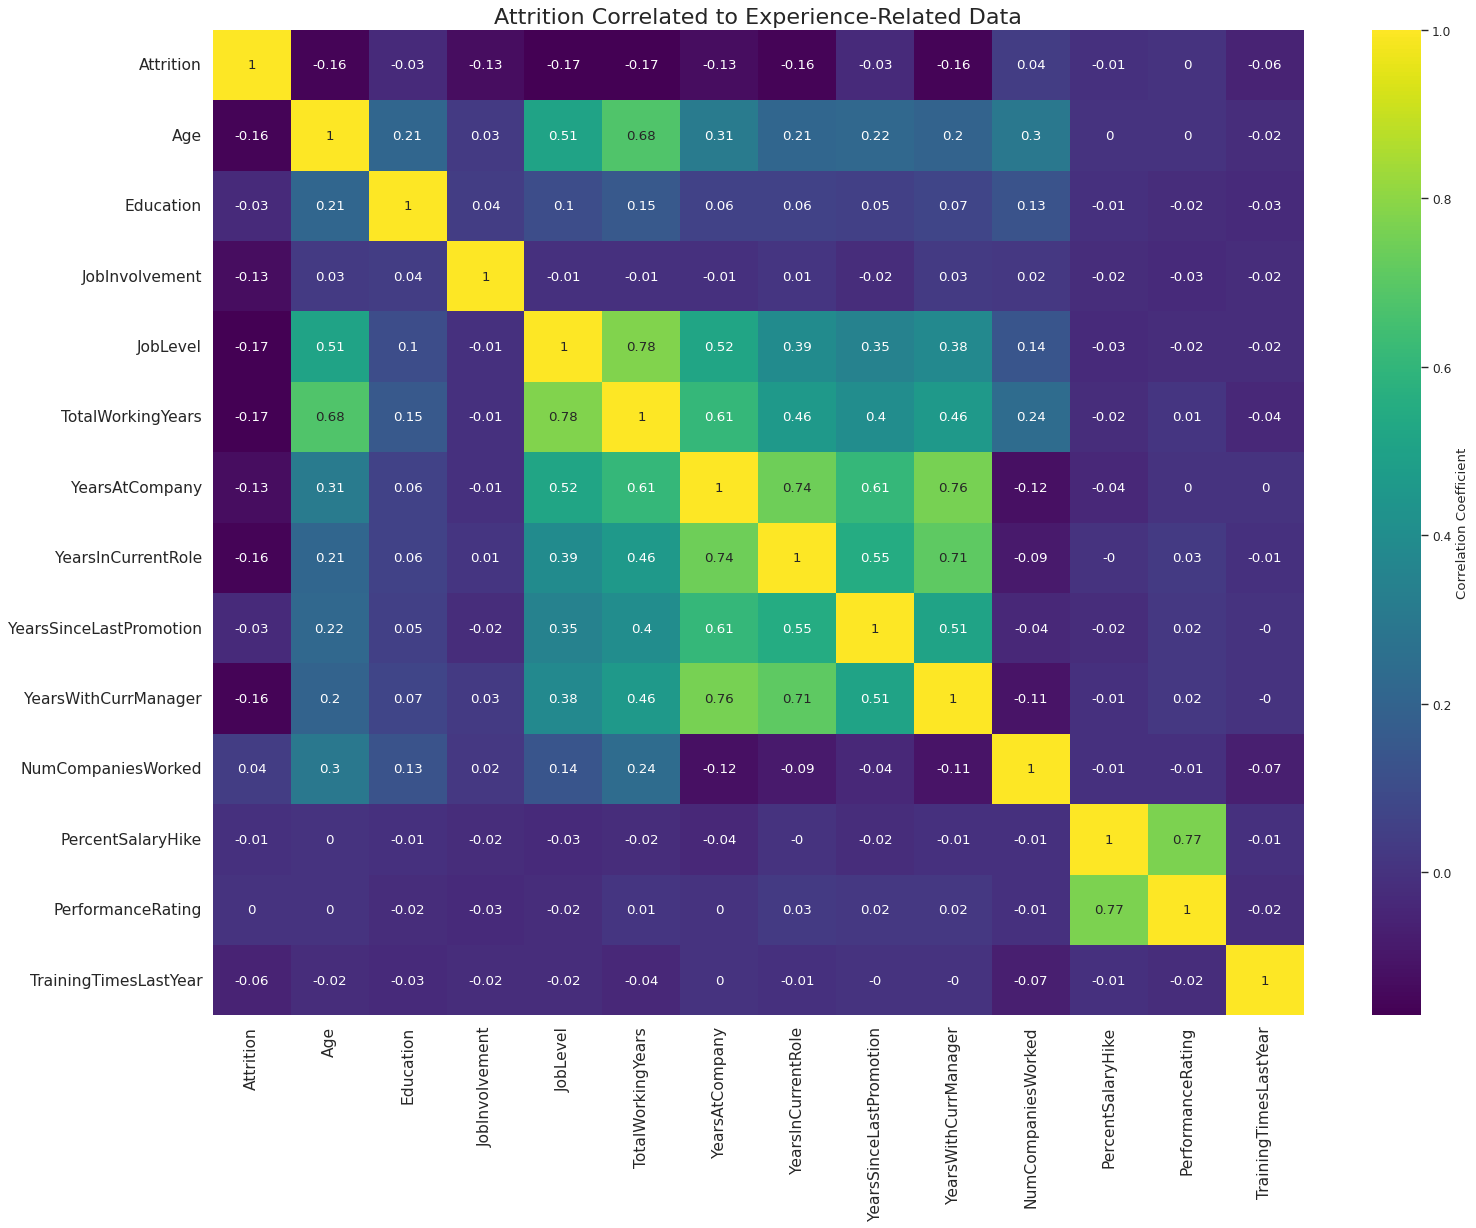

In [48]:
#Make smaller correlation plot subsets for easier viewing
#Experience Plot
experience_df = my_df2.loc[0:,['Attrition','Age','Education','JobInvolvement','JobLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear']]

# Multivariate exploratory data analysis
# calculate a correlation of experience-related numeric data in df
corr = experience_df.corr()
corr = corr.round(2)

# create a multivariate heatmap showing correlations between numeric columns
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (22,16), dpi = 80)

# create heatmap showing correlation between numeric data
sns.set(font_scale=1.0);
ax = sns.heatmap(data=corr,
            annot=True,
            cmap='viridis',
            cbar_kws={'label': 'Correlation Coefficient'});

# set x and y labels and font size
ax.set_title("Attrition Correlated to Experience-Related Data", fontsize=20);
#ax.set_ylabel("Attrition Data Columns", fontsize=16);
#ax.set_xlabel("Attrition Data Columns", fontsize=16);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14);
ax.set_xticklabels(ax.get_ymajorticklabels(), fontsize = 14);

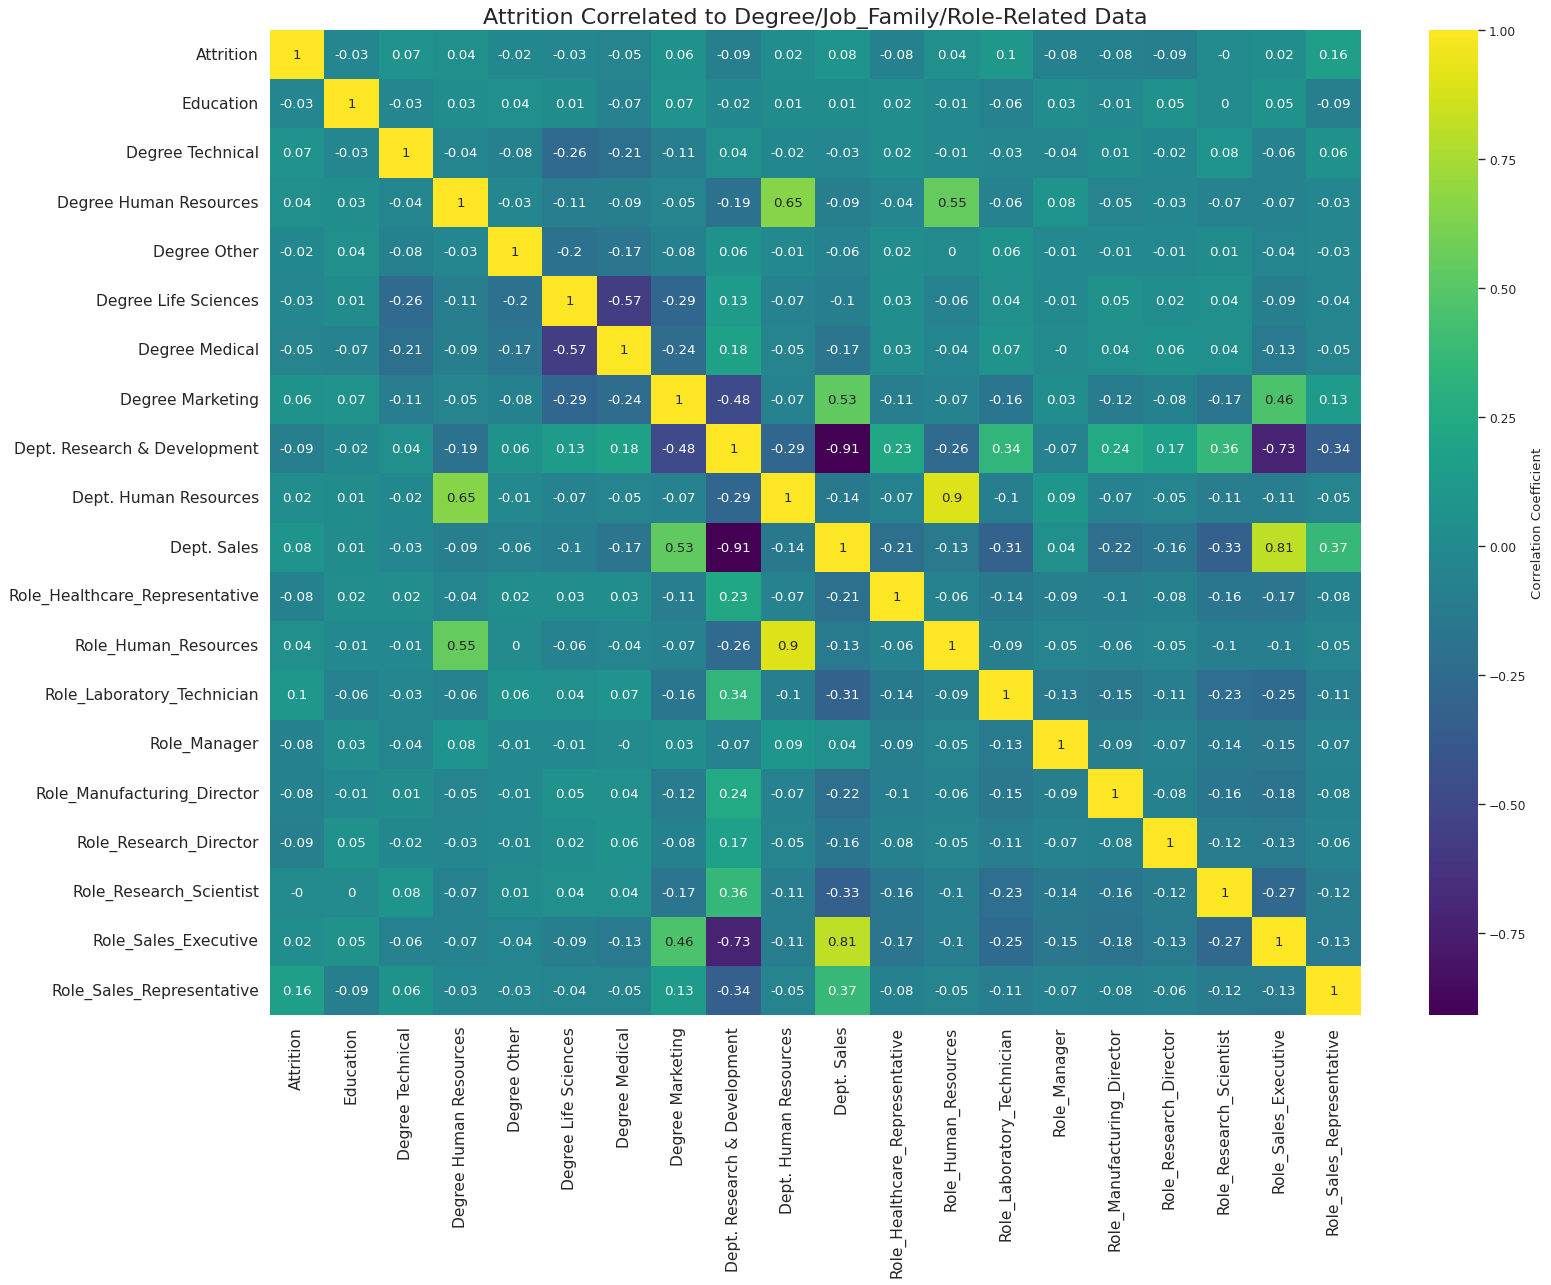

In [59]:
#Make smaller correlation plot subsets for easier viewing
#Job Family/Degree/Field Plot
job_family_df = my_df2.loc[0:,['Attrition','Education','Degree Technical','Degree Human Resources', 'Degree Other',
       'Degree Life Sciences', 'Degree Medical', 'Degree Marketing','Dept. Research & Development','Dept. Human Resources','Dept. Sales','Role_Healthcare_Representative',
       'Role_Human_Resources', 'Role_Laboratory_Technician', 'Role_Manager',
       'Role_Manufacturing_Director', 'Role_Research_Director',
       'Role_Research_Scientist', 'Role_Sales_Executive',
       'Role_Sales_Representative']]

# Multivariate exploratory data analysis
# calculate a correlation of experience-related numeric data in df
corr = job_family_df.corr()
corr = corr.round(2)

# create a multivariate heatmap showing correlations between numeric columns
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (22,16), dpi = 80)

# create heatmap showing correlation between numeric data
sns.set(font_scale=1.0);
ax = sns.heatmap(data=corr,
            annot=True,
            cmap='viridis',
            cbar_kws={'label': 'Correlation Coefficient'});

# set x and y labels and font size
ax.set_title("Attrition Correlated to Degree/Job_Family/Role-Related Data", fontsize=20);
#ax.set_ylabel("Attrition Data Columns", fontsize=16);
#ax.set_xlabel("Attrition Data Columns", fontsize=16);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14);
ax.set_xticklabels(ax.get_ymajorticklabels(), fontsize = 14);

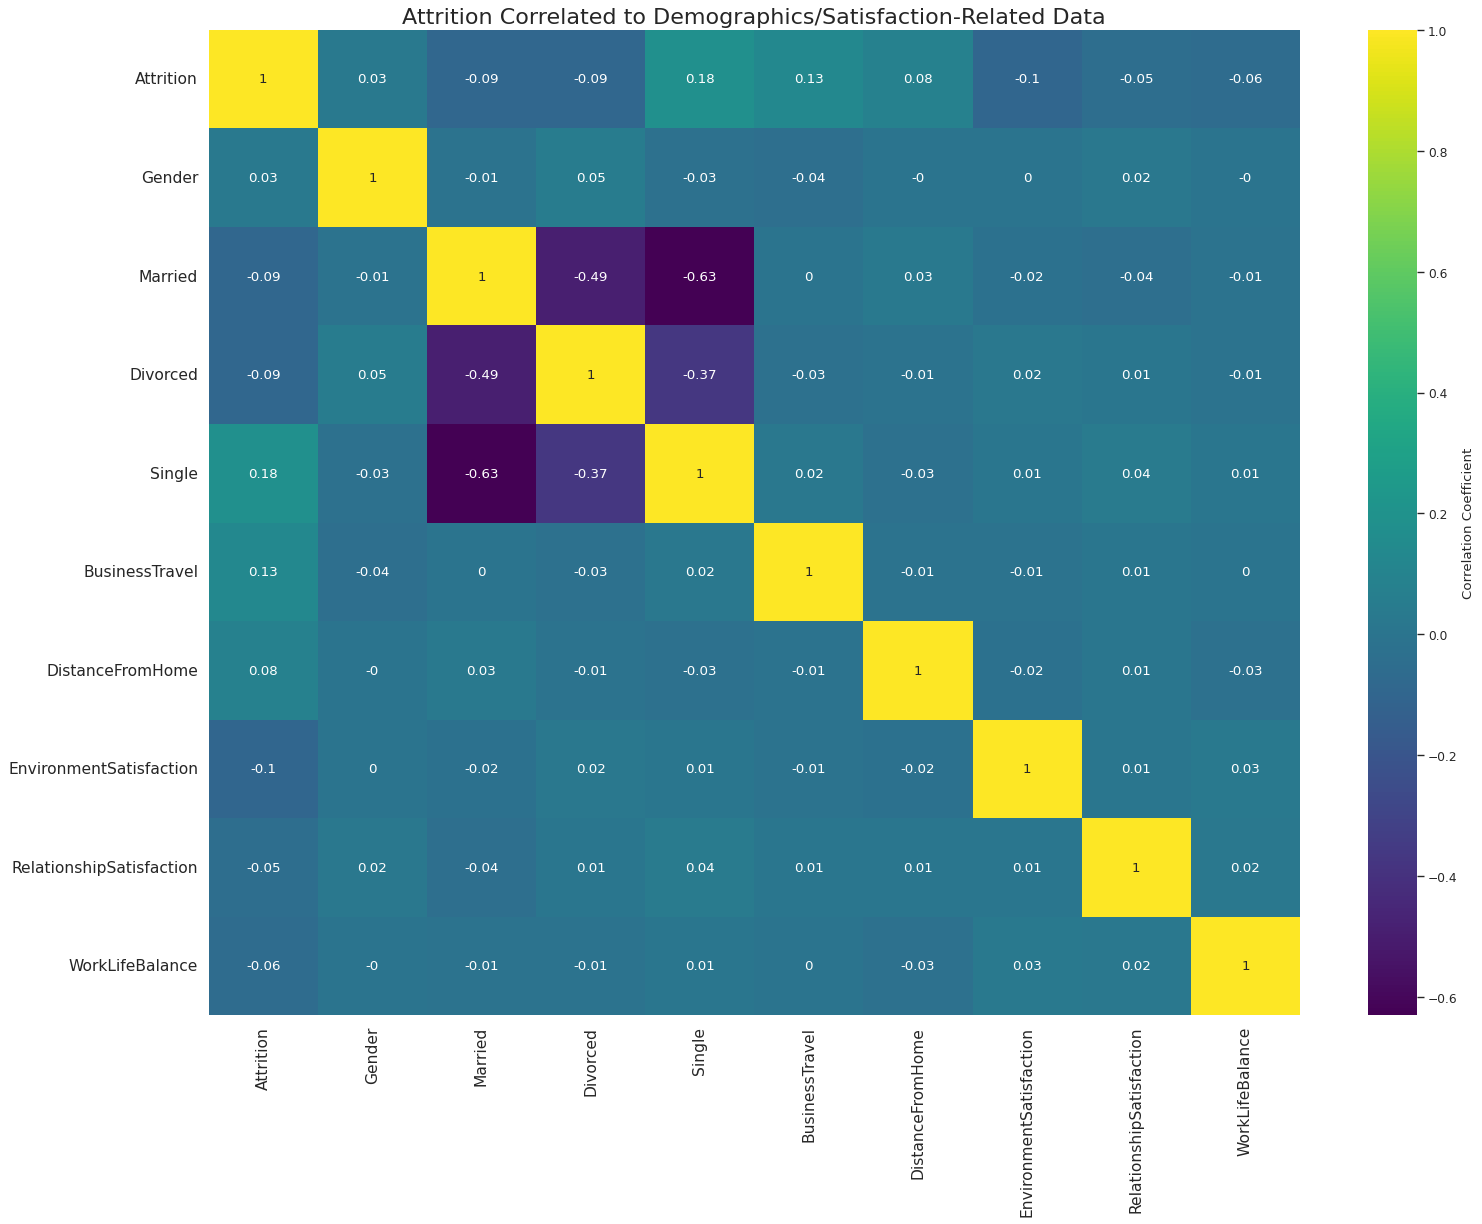

In [58]:
#Make smaller correlation plot subsets for easier viewing
#Personal-Life/Job Satisfaction-Related Attrition Plot
personal_df = my_df2.loc[0:,['Attrition','Gender','Married',
       'Divorced', 'Single','BusinessTravel','DistanceFromHome','EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance']]

# Multivariate exploratory data analysis
# calculate a correlation of experience-related numeric data in df
corr = personal_df.corr()
corr = corr.round(2)

# create a multivariate heatmap showing correlations between numeric columns
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (22,16), dpi = 80)

# create heatmap showing correlation between numeric data
sns.set(font_scale=1.0);
ax = sns.heatmap(data=corr,
            annot=True,
            cmap='viridis',
            cbar_kws={'label': 'Correlation Coefficient'});

# set x and y labels and font size
ax.set_title("Attrition Correlated to Demographics/Satisfaction-Related Data", fontsize=20);
#ax.set_ylabel("Attrition Data Columns", fontsize=16);
#ax.set_xlabel("Attrition Data Columns", fontsize=16);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14);
ax.set_xticklabels(ax.get_ymajorticklabels(), fontsize = 14);

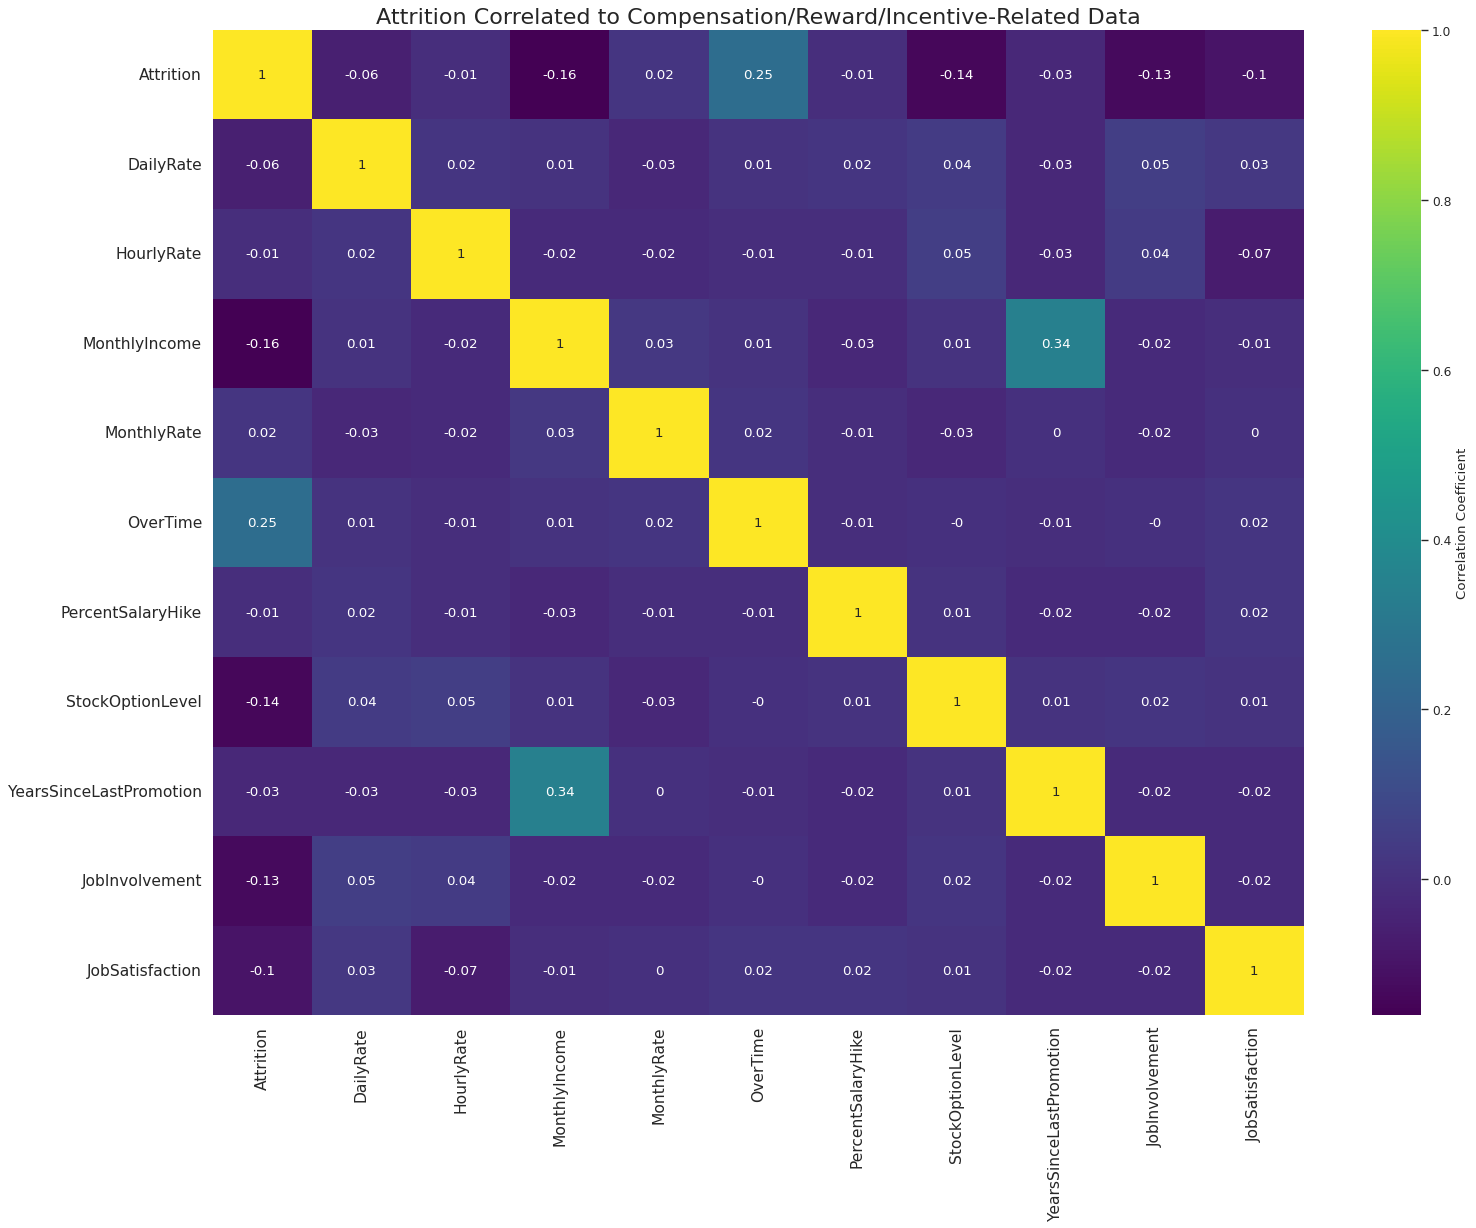

In [108]:
#Make smaller correlation plot subsets for easier viewing
#Pay/Compensation/Performance-Related Attrition Plot
compensation_df = my_df2.loc[0:,['Attrition','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','OverTime','PercentSalaryHike','StockOptionLevel','YearsSinceLastPromotion','JobInvolvement','JobSatisfaction']]

# Multivariate exploratory data analysis
# calculate a correlation of experience-related numeric data in df
corr = compensation_df.corr()
corr = corr.round(2)

# create a multivariate heatmap showing correlations between numeric columns
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (22,16), dpi = 80)

# create heatmap showing correlation between numeric data
sns.set(font_scale=1.0);
ax = sns.heatmap(data=corr,
            annot=True,
            cmap='viridis',
            cbar_kws={'label': 'Correlation Coefficient'});

# set x and y labels and font size
ax.set_title("Attrition Correlated to Compensation/Reward/Incentive-Related Data", fontsize=20);
#ax.set_ylabel("Attrition Data Columns", fontsize=16);
#ax.set_xlabel("Attrition Data Columns", fontsize=16);
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14);
ax.set_xticklabels(ax.get_ymajorticklabels(), fontsize = 14);

In [60]:
# Filter and new dataframe containing only ratings data (scale = 1 to 4). These categories include "Education",
# "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", and
# "WorkLifeBalance"

scale_data_fil = pd.DataFrame([my_df['EmployeeNumber'], my_df['EnvironmentSatisfaction'], my_df['JobInvolvement'], my_df['JobSatisfaction'], my_df['PerformanceRating'], my_df['RelationshipSatisfaction'], my_df['WorkLifeBalance']])
scale_dat = scale_data_fil.transpose()
scale_dat = scale_dat.set_index('EmployeeNumber')
scale_dat

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,
1,2,3,4,3,1,1
2,3,2,2,4,4,3
4,4,2,3,3,2,3
5,4,3,3,3,3,3
7,1,3,2,3,4,3
...,...,...,...,...,...,...
2061,3,4,4,3,3,3
2062,4,2,1,3,1,3
2064,2,4,2,4,2,3


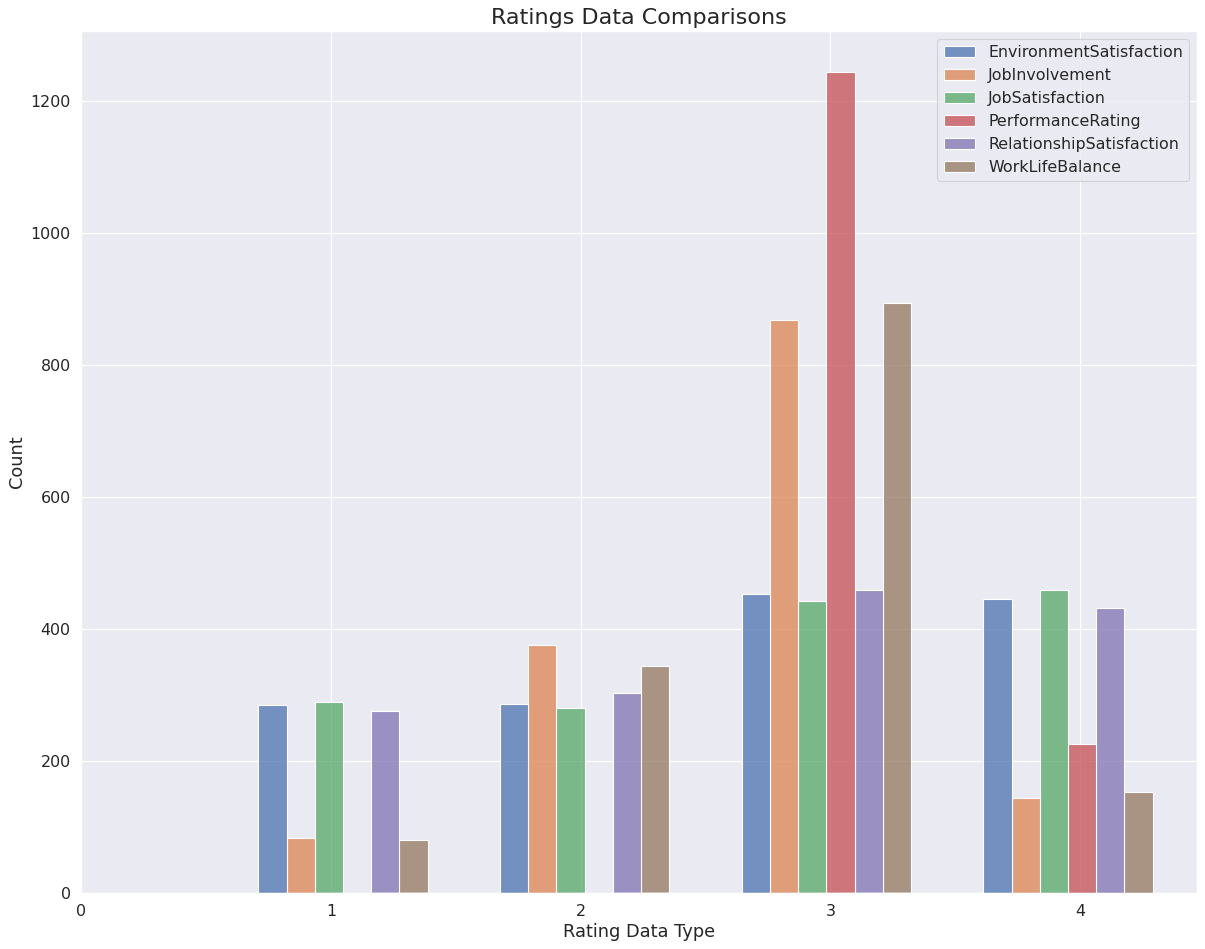

In [61]:
# Second Multivariate Analysis Comparison
# Create a comparative bar plot showing counts of ratings data relative to one another (https://seaborn.pydata.org/generated/seaborn.histplot.html)

# set figure size and resolution)
figure(figsize= (18,14), dpi = 80)

# create histogram showing relative ratings data
sns.set(font_scale=1.3);
ax = sns.histplot(scale_dat, multiple="dodge", shrink=7);

# set x and y labels and font size
ax.set_title("Ratings Data Comparisons", fontsize=20);
ax.set_ylabel("Count", fontsize=16);
ax.set_xlabel("Rating Data Type", fontsize=16);
ax.set(xticks=[0,1,2,3,4]);

This comparative bar plot showing ratings data comparisons show that most employees gave 'good' (4) or 'very good' (5) ratings for Job Involvement, Performance Rating, and Work Life Balance.

#Bar Plots Showing Attrition versus Most Correlated Columns

##Experience Related Categories





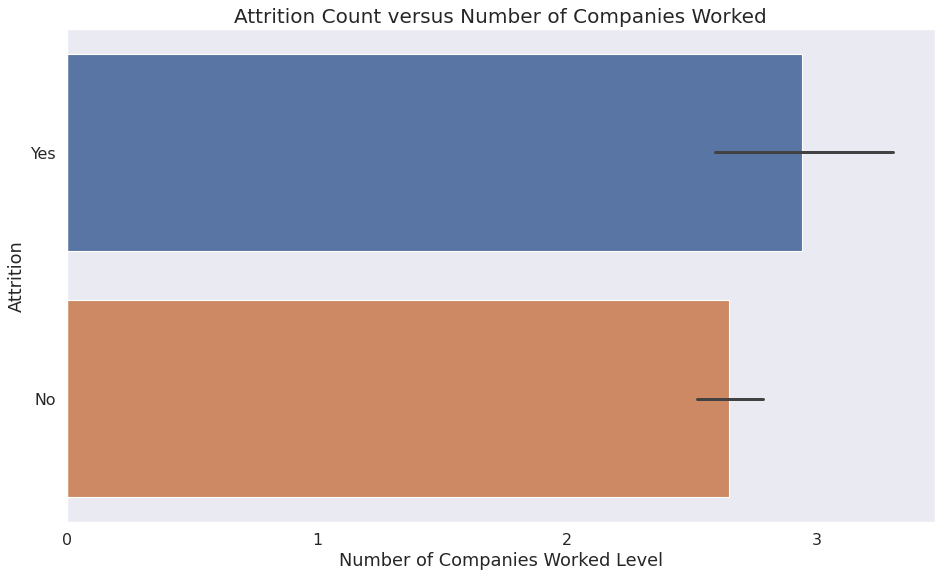

In [73]:
# Create a barplot showing Attrition versus The Number of Companies an Employee has Previously Worked At

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['NumCompaniesWorked'], y=my_df['Attrition']);


# set x and y labels and font size
ax.set_title("Attrition Count versus Number of Companies Worked", fontsize=18);
ax.set_ylabel("Attrition", fontsize=16);
ax.set_xlabel("Number of Companies Worked Level", fontsize=16)
ax.set_xticks([0, 1, 2, 3]);

This figure shows that attrition is more likely if an employee has worked for more companies

##Job Family and Role Related Categories

In [103]:
my_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

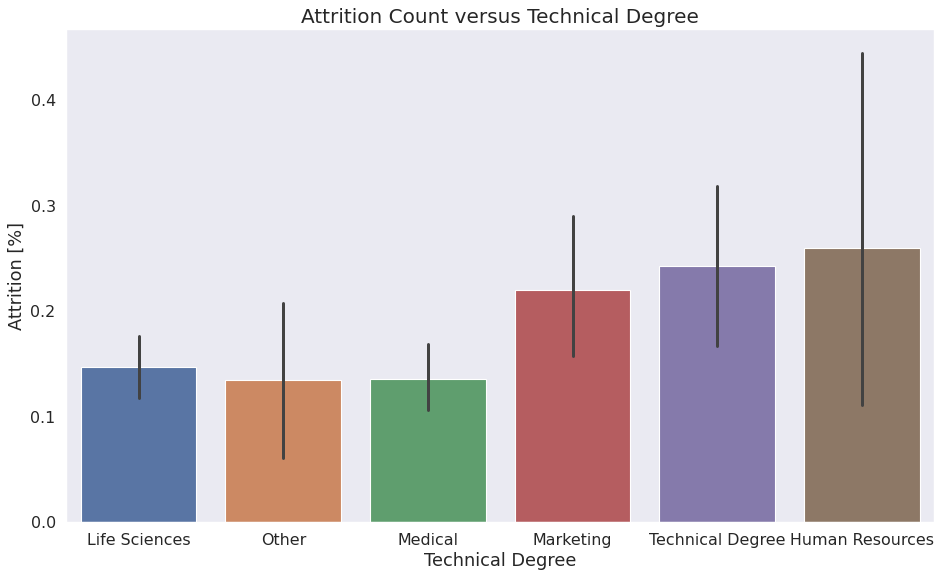

In [104]:
#Create a barplot showing Attrition versus if the Employee has a technical degree

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['EducationField'], y=my_df2['Attrition']);


# set x and y labels and font size
ax.set_title("Attrition Count versus Technical Degree", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("Technical Degree", fontsize=16);
#ax.set_xticklabels(["No", "Yes"]);

These figures show that attrition is more likely for those in the company with technical and marketing degrees. Human Resources Degrees also show higher attrition but the variance is so high as to imply other factors account for the attrition.

##Demographic and Personal Satisfaction Categories

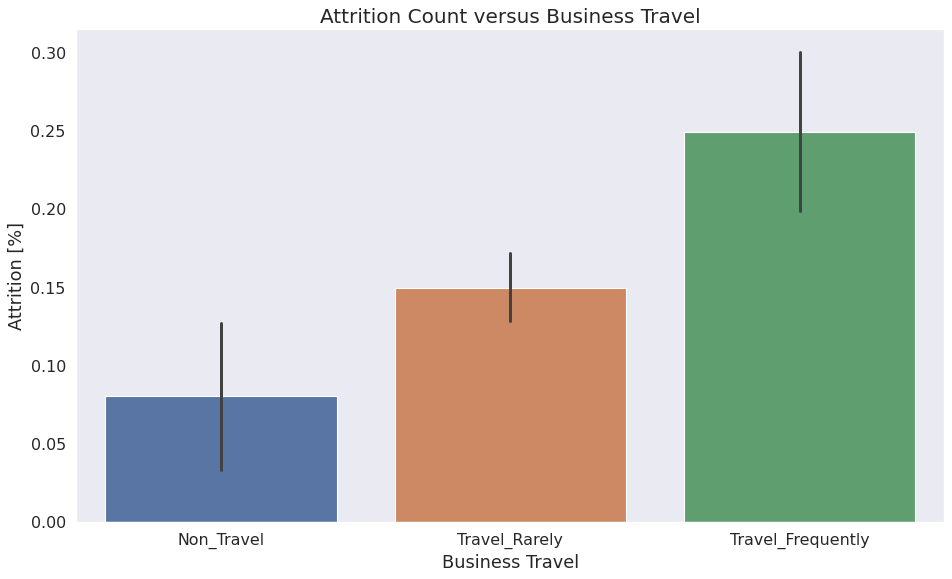

In [93]:
#Create a barplot showing Attrition versus Business Travel

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df2, x=my_df2['BusinessTravel'], y=my_df2['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Business Travel", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("Business Travel", fontsize=16)
ax.set_xticklabels(["Non_Travel", "Travel_Rarely","Travel_Frequently"]);

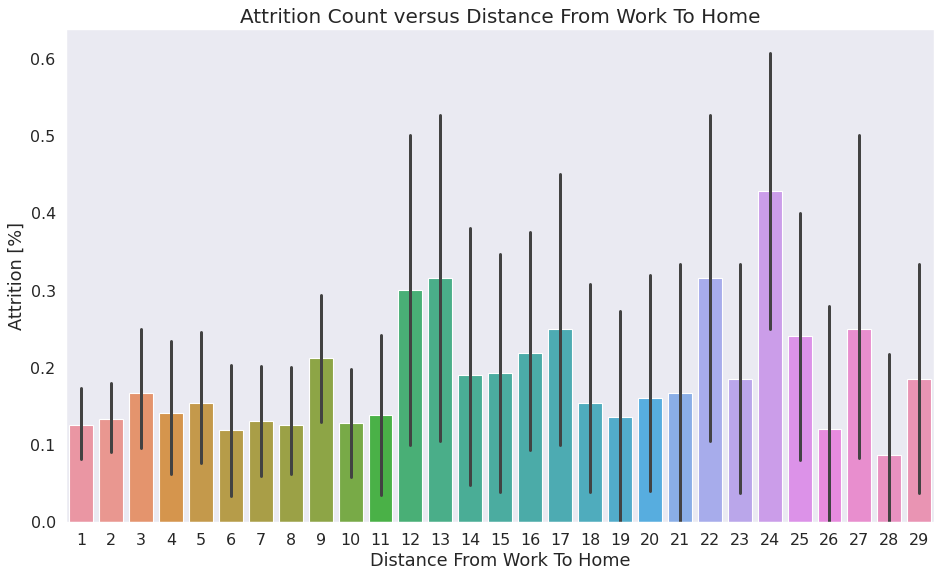

In [95]:
#Create a barplot showing Attrition versus Distance From Work To Home

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df2, x=my_df2['DistanceFromHome'], y=my_df2['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Distance From Work To Home", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("Distance From Work To Home", fontsize=16);
#ax.set_xticklabels(["Non_Travel", "Travel_Rarely","Travel_Frequently"]);

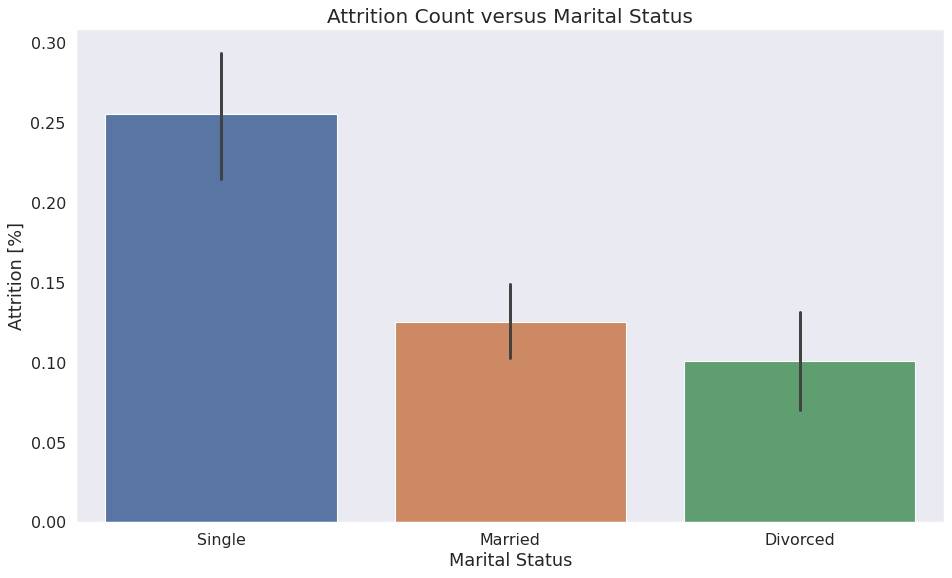

In [102]:
#Create a barplot showing Attrition versus Marital Status

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['MaritalStatus'], y=my_df2['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Marital Status", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("Marital Status", fontsize=16);
#ax.set_xticklabels(["Non_Travel", "Travel_Rarely","Travel_Frequently"]);

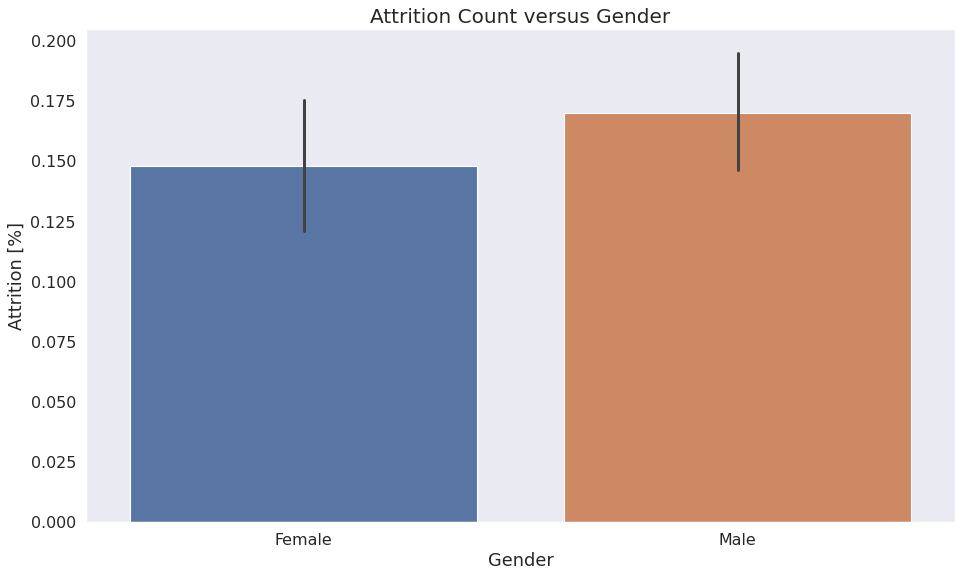

In [106]:
#Create a barplot showing Attrition versus Gender

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['Gender'], y=my_df2['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Gender", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("Gender", fontsize=16);
#ax.set_xticklabels(["Non_Travel", "Travel_Rarely","Travel_Frequently"]);

##Compensation and Engagement Categories




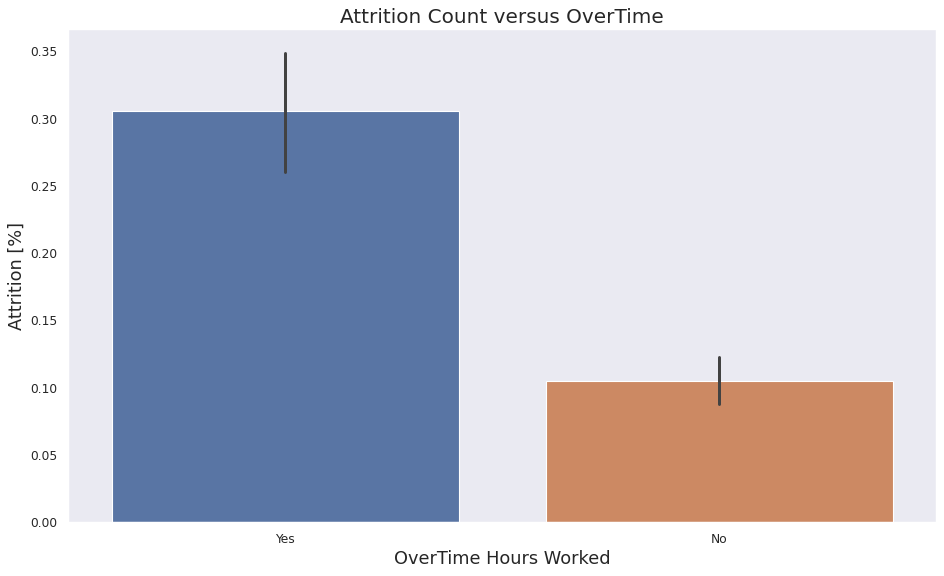

In [112]:
#Create a barplot showing Attrition versus OverTime

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['OverTime'], y=my_df2['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus OverTime", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("OverTime Worked", fontsize=16);
#ax.set_xticklabels(["Non_Travel", "Travel_Rarely","Travel_Frequently"]);

In [150]:
##Bin Monthly Income into 7 categories
#0-3000
#3001-6000
#6001-9000
#9001-12000
#12000 and above

monthly_income_list = my_df2['MonthlyIncome'].values.tolist()

#Job Role
income_bin_ls = []
for i in range(0,len(monthly_income_list),1):
  val = monthly_income_list[i]
  if val == 0 and val <=2000:
    income_bin_ls.append(0)
  elif val >2000 and val <=4000:
    income_bin_ls.append(1)
  elif val >4000 and val <=6000:
    income_bin_ls.append(2)
  elif val >6000 and val <=8000:
    income_bin_ls.append(3)
  elif val >8000 and val <=10000:
    income_bin_ls.append(4)
  elif val >10000 and val <=12000:
    income_bin_ls.append(5)
  elif val >12000 and val <=14000:
    income_bin_ls.append(6)
  else:
    income_bin_ls.append(7)

my_df2['MonthlyIncomeLevel'] = income_bin_ls

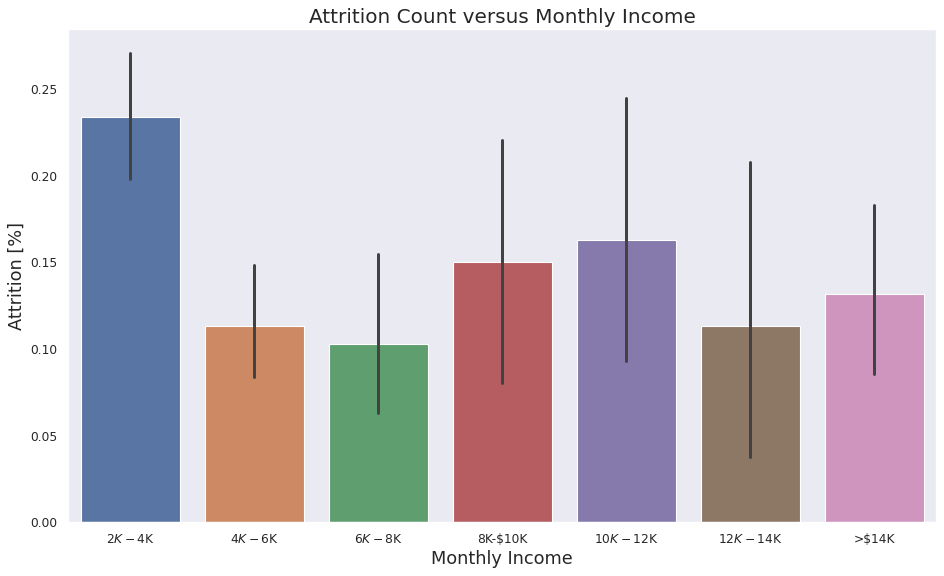

In [149]:
#Create a barplot showing Attrition versus Monthly Income

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df2, x=my_df2['MonthlyIncomeLevel'], y=my_df2['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Monthly Income", fontsize=18);
ax.set_ylabel("Attrition [%]", fontsize=16);
ax.set_xlabel("Monthly Income", fontsize=16);
ax.set_xticklabels(["$2K-$4K", "$4K-$6K","$6K-$8K","8K-$10K","$10K-$12K","$12K-$14K",">$14K"]);

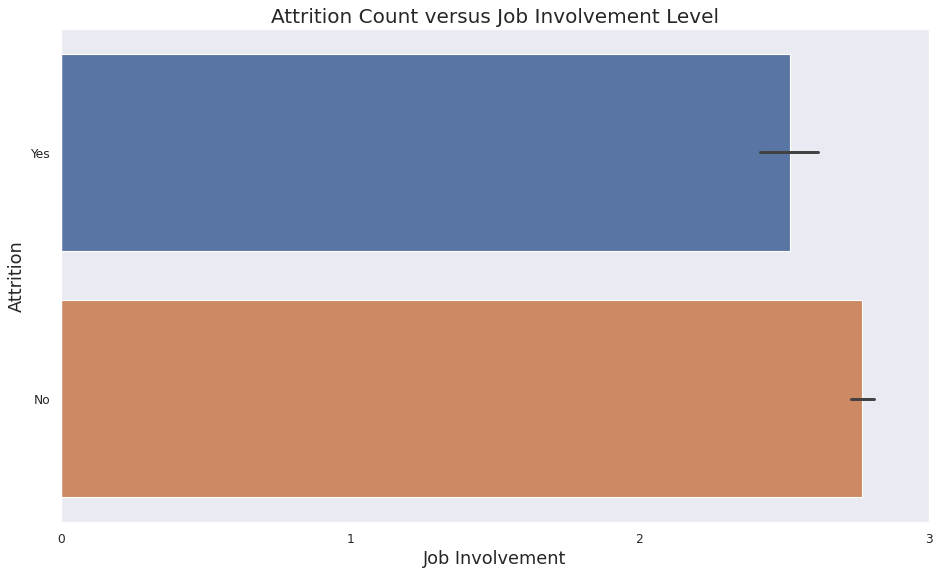

In [111]:
# Create a barplot showing Attrition versus Job Involvement

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['JobInvolvement'], y=my_df['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Job Involvement Level", fontsize=18);
ax.set_ylabel("Attrition", fontsize=16);
ax.set_xlabel("Job Involvement", fontsize=16);
ax.set_xticks([0, 1, 2, 3]);

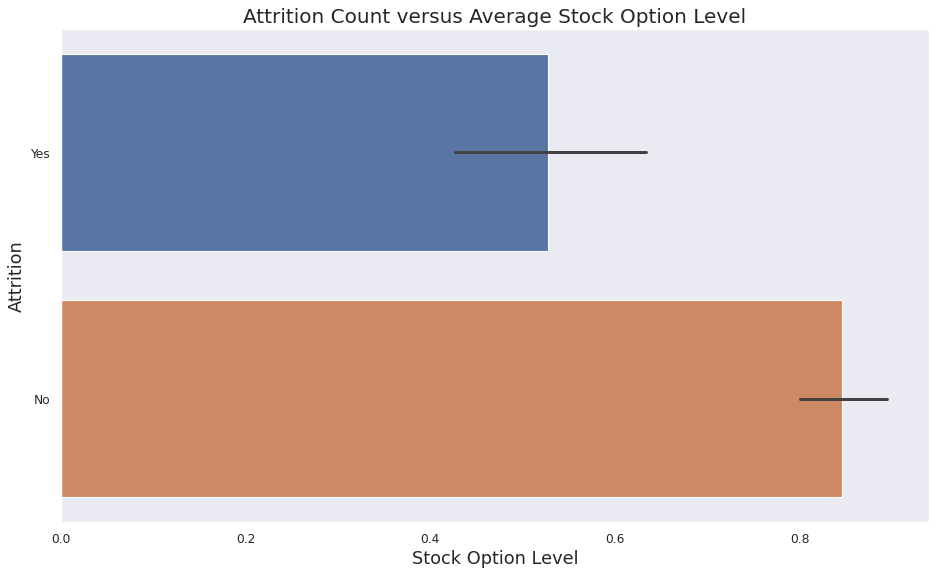

In [113]:
# Create a barplot showing Attrition versus StockOptionLevel

# set figure attributes
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.pyplot import figure
sns.set_style("dark") #set style in seaborn

# set figure size and resolution)
figure(figsize= (14,8), dpi = 80);

# create figure
ax = sns.barplot(data = my_df, x=my_df['StockOptionLevel'], y=my_df['Attrition']);

# set x and y labels and font size
ax.set_title("Attrition Count versus Average Stock Option Level", fontsize=18);
ax.set_ylabel("Attrition", fontsize=16);
ax.set_xlabel("Stock Option Level", fontsize=16);

This figure shows that there is a significant difference between those who have higher job involvement levels and retainment of staff with staff who are more highly involved being better retained.